# Offset Extraction
***
Determine the offset basedon measurements of hydrogen

In [1]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


from scipy.signal import find_peaks

In [3]:
#Get Data
cols = ["wavelength", "intensity"]
raw_data1 = pd.read_csv("DataFiles/hydrogen_green_tube_multi_point1_300_900_nm.txt", delimiter="\t", names=cols)
raw_data2 = pd.read_csv("DataFiles/hydrogen_green_tube_multi_point3_300_900_nm_run_2.txt", delimiter="\t", names=cols)
raw_data3 = pd.read_csv("DataFiles/hydrogen_green_tube_multi_point3_300_900_nm_run_3.txt", delimiter="\t", names=cols)


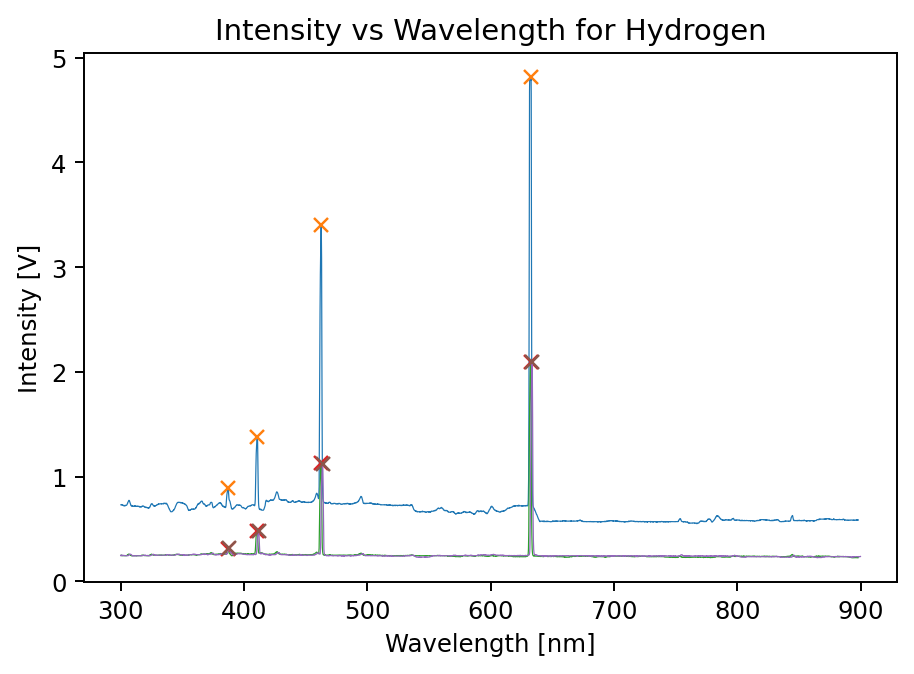

In [11]:
#Get Peaks & Plot
plt.figure(dpi=175)
plt.title("Intensity vs Wavelength for Hydrogen")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")

proms = [0.15, 0.051, 0.051]
data_files = [raw_data1, raw_data2, raw_data3]

i=0
for raw_data in data_files:
    peaks, properties = find_peaks(raw_data["intensity"], height=0, prominence=proms[i], distance=30)#, threshold=12, distance=1)#, width=2)

    plt.plot(raw_data["wavelength"], raw_data["intensity"], lw=.5)
    plt.plot(raw_data["wavelength"][peaks], raw_data["intensity"][peaks], "x", label=raw_data["wavelength"][peaks])
    i+=1